<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/main/TALLER/EVALUACION/SONCCO_QUISPE_SADUC_EVA_PARTE01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow scikit-learn pandas matplotlib seaborn --quiet


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import joblib
import os


In [1]:
import pandas as pd

# Cargar archivos
df1 = pd.read_csv('/content/index_1.csv')
df2 = pd.read_csv('/content/index_2.csv')

# Unir datasets
df = pd.concat([df1, df2], ignore_index=True)

# Verificar datos cargados
print("Shape:", df.shape)
df.head()


Shape: (3898, 6)


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [6]:
# Convertir columnas a datetime
# Convertir columnas a datetime con formato mixto
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed')
df['date'] = pd.to_datetime(df['date'], format='mixed')


# Extraer características de la columna datetime
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.dayofweek  # 0 = lunes, 6 = domingo
df['hour'] = df['datetime'].dt.hour

# Revisar si hay valores faltantes
print("Valores nulos por columna:")
print(df.isnull().sum())

# Ver primeras filas con las nuevas columnas
df[['date', 'datetime', 'month', 'day_of_week', 'hour']].head()


Valores nulos por columna:
date             0
datetime         0
cash_type        0
card           351
money            0
coffee_name      0
month            0
day_of_week      0
hour             0
dtype: int64


,date,datetime,month,day_of_week,hour
0,2024-03-01,2024-03-01 10:15:50.520,3,4,10
1,2024-03-01,2024-03-01 12:19:22.539,3,4,12
2,2024-03-01,2024-03-01 12:20:18.089,3,4,12
3,2024-03-01,2024-03-01 13:46:33.006,3,4,13
4,2024-03-01,2024-03-01 13:48:14.626,3,4,13


In [7]:
# Agrupar por fecha para calcular el total de ventas por día
daily_sales = df.groupby('date').agg({
    'money': 'sum',
    'month': 'first',
    'day_of_week': 'first'
}).reset_index()

# Renombrar la columna de ventas
daily_sales.rename(columns={'money': 'cantidad_total_vendida_no_dia'}, inplace=True)

# Mostrar las primeras filas
daily_sales.head()


,date,cantidad_total_vendida_no_dia,month,day_of_week
0,2024-03-01,396.3,3,4
1,2024-03-02,228.1,3,5
2,2024-03-03,349.1,3,6
3,2024-03-04,135.2,3,0
4,2024-03-05,338.5,3,1


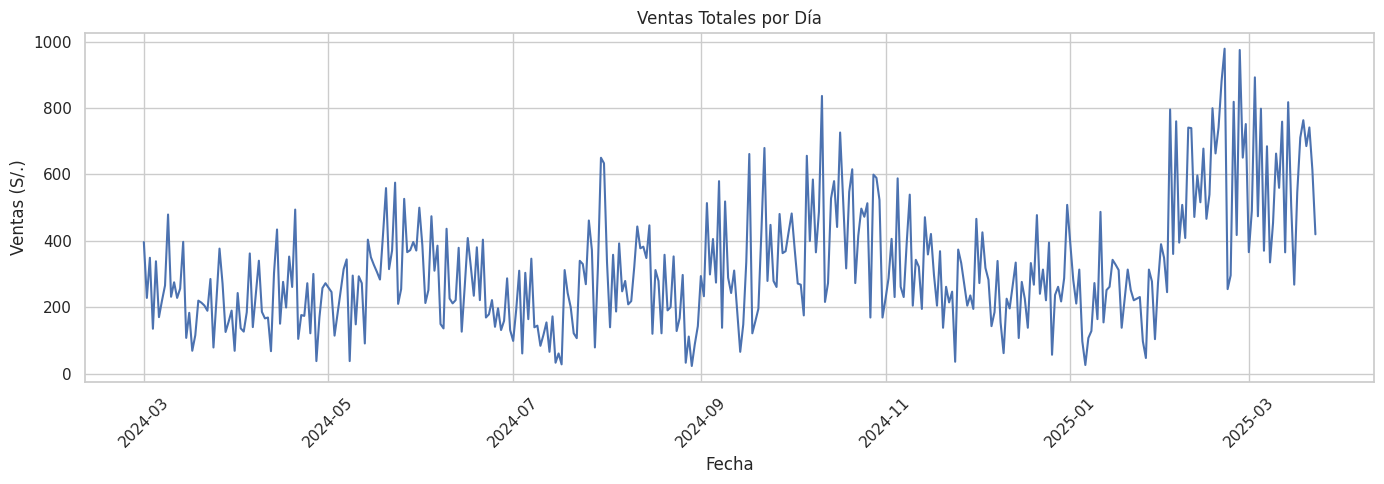

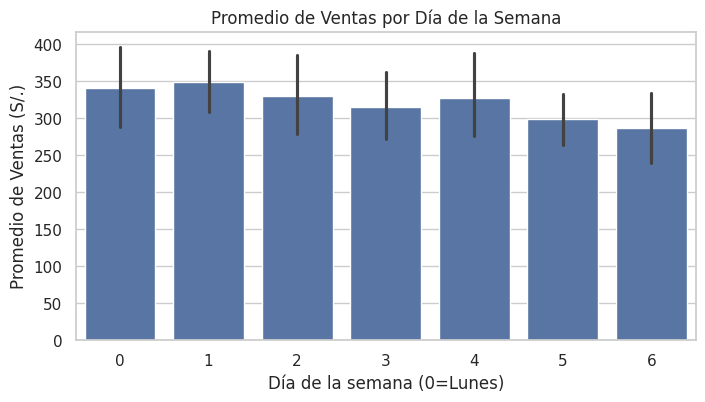

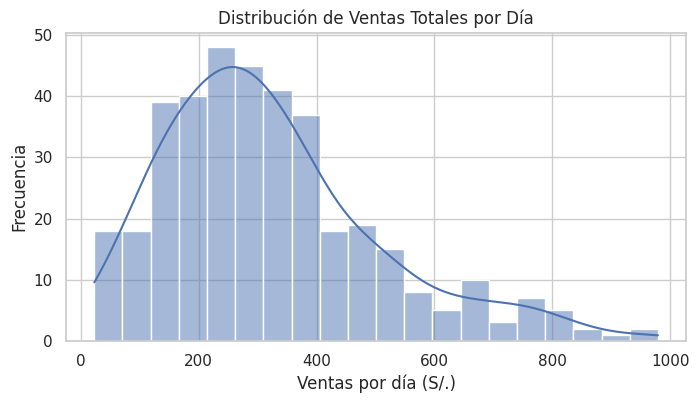

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo bonito
sns.set(style="whitegrid")

# 1. Evolución de ventas por día
plt.figure(figsize=(14,5))
sns.lineplot(data=daily_sales, x='date', y='cantidad_total_vendida_no_dia')
plt.title('Ventas Totales por Día')
plt.xlabel('Fecha')
plt.ylabel('Ventas (S/.)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Ventas promedio por día de la semana
plt.figure(figsize=(8,4))
sns.barplot(data=daily_sales, x='day_of_week', y='cantidad_total_vendida_no_dia', estimator='mean')
plt.title('Promedio de Ventas por Día de la Semana')
plt.xlabel('Día de la semana (0=Lunes)')
plt.ylabel('Promedio de Ventas (S/.)')
plt.show()

# 3. Distribución de ventas
plt.figure(figsize=(8,4))
sns.histplot(daily_sales['cantidad_total_vendida_no_dia'], bins=20, kde=True)
plt.title('Distribución de Ventas Totales por Día')
plt.xlabel('Ventas por día (S/.)')
plt.ylabel('Frecuencia')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Features y variable objetivo
X = daily_sales[['month', 'day_of_week']]
y = daily_sales['cantidad_total_vendida_no_dia']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Definir el modelo
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # salida de regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, verbose=0)

# Mostrar resumen del modelo
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,925 (7.52 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,284 (5.02 KB)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test_scaled).flatten()

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
MAE: 141.70
MSE: 32022.62
RMSE: 178.95
R²: 0.0948


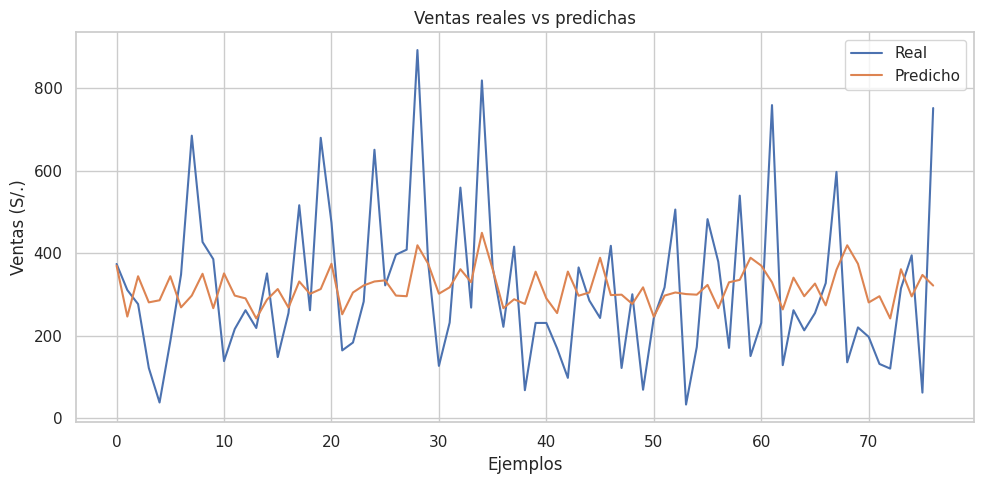

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicho')
plt.title('Ventas reales vs predichas')
plt.xlabel('Ejemplos')
plt.ylabel('Ventas (S/.)')
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
!pip install joblib


In [16]:
import joblib

# Guardar el modelo en formato .h5
model.save("modelo_ventas_totales.h5")

# Guardar el scaler
joblib.dump(scaler, "scaler_ventas_totales.pkl")

print("Modelo y scaler guardados.")


Modelo y scaler guardados.


In [17]:
!pip install flask flask-cors


In [19]:
from tensorflow.keras.losses import MeanSquaredError

# Compilar con función explícita en lugar de string 'mse'
model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=['mae'])

# (re)entrenar si es necesario
# model.fit(...)

# Guardar de nuevo
model.save("modelo_ventas_totales.h5")


In [20]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import tensorflow as tf
import joblib
import numpy as np

# Cargar modelo y scaler
modelo = tf.keras.models.load_model("modelo_ventas_totales.h5")
scaler = joblib.load("scaler_ventas_totales.pkl")

# Inicializar Flask
app = Flask(__name__)
CORS(app)

@app.route('/predecir', methods=['POST'])
def predecir():
    data = request.get_json()

    # Extraer datos
    mes = data.get("month")
    dia_semana = data.get("day_of_week")

    # Preprocesar entrada
    entrada = np.array([[mes, dia_semana]])
    entrada_scaled = scaler.transform(entrada)

    # Realizar predicción
    prediccion = modelo.predict(entrada_scaled)
    resultado = float(prediccion[0][0])

    return jsonify({"prediccion_ventas": round(resultado, 2)})

# Solo se ejecuta si usamos ngrok (ver siguiente paso)


In [21]:
import tensorflow as tf
import joblib

modelo = tf.keras.models.load_model("modelo_ventas_totales.h5")
scaler = joblib.load("scaler_ventas_totales.pkl")


In [24]:
pip install flask flask-cors tensorflow joblib


In [26]:
import threading
from flask import Flask, request, jsonify
from flask_cors import CORS
import tensorflow as tf
import joblib
import numpy as np

# Cargar modelo y scaler
modelo = tf.keras.models.load_model("modelo_ventas_totales.h5")
scaler = joblib.load("scaler_ventas_totales.pkl")

# Crear aplicación Flask
app = Flask(__name__)
CORS(app)

@app.route('/predecir', methods=['POST'])
def predecir():
    data = request.get_json()
    mes = data.get("month")
    dia_semana = data.get("day_of_week")
    entrada = np.array([[mes, dia_semana]])
    entrada_scaled = scaler.transform(entrada)
    prediccion = modelo.predict(entrada_scaled)
    resultado = float(prediccion[0][0])
    return jsonify({"prediccion_ventas": round(resultado, 2)})

# Ejecutar Flask en un hilo (en localhost)
def run_flask():
    app.run(port=5000)

flask_thread = threading.Thread(target=run_flask)
flask_thread.start()


 * Serving Flask app '__main__'


In [27]:
import requests

# Enviar una solicitud POST al servidor Flask local
url = "http://127.0.0.1:5000/predecir"
datos = {
    "month": 6,
    "day_of_week": 4
}

respuesta = requests.post(url, json=datos)

# Mostrar respuesta
print("Respuesta de la API:")
print(respuesta.json())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


INFO:werkzeug:127.0.0.1 - - [28/Jun/2025 20:19:18] "POST /predecir HTTP/1.1" 200 -


Respuesta de la API:
{'prediccion_ventas': 252.65}


In [28]:
# Agrupar por fecha y tipo de café (suma de money por tipo)
pivot_df = df.groupby(['date', 'coffee_name'])['money'].sum().reset_index()

# Convertir a tabla pivot para que cada tipo de café sea una columna
ventas_por_cafe = pivot_df.pivot(index='date', columns='coffee_name', values='money').fillna(0)

# Agregar variables temporales (mes y día de la semana)
ventas_por_cafe['month'] = ventas_por_cafe.index.month
ventas_por_cafe['day_of_week'] = ventas_por_cafe.index.dayofweek

# Mostrar las primeras filas
ventas_por_cafe.head()


coffee_name,Americano,Americano with Milk,Americano with milk,Cappuccino,Caramel,Caramel coffee,Caramel with Irish whiskey,Caramel with chocolate,Caramel with milk,Chocolate,...,Irish whiskey with milk,Irish with chocolate,Latte,Mochaccino,Super chocolate,Tea,Vanilla coffee,Vanilla with Irish whiskey,month,day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2024-03-01,28.9,135.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,77.4,0.0,0.0,0.0,0.0,0.0,3,4
2024-03-02,86.7,101.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,3,5
2024-03-03,28.9,67.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,78.7,0.0,0.0,0.0,0.0,0.0,3,6
2024-03-04,0.0,33.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,77.4,0.0,0.0,0.0,0.0,0.0,3,0
2024-03-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,116.1,0.0,0.0,0.0,0.0,0.0,3,1


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Entradas (features)
X = ventas_por_cafe[['month', 'day_of_week']]

# Salidas (ventas por tipo de café)
Y = ventas_por_cafe.drop(columns=['month', 'day_of_week'])

# Dividir en train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Escalar entradas
scaler_2 = StandardScaler()
X_train_scaled = scaler_2.fit_transform(X_train)
X_test_scaled = scaler_2.transform(X_test)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear modelo con tantas salidas como tipos de café
modelo2 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(Y_train.shape[1])  # salida multi-output
])

modelo2.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar
hist2 = modelo2.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=100, verbose=0)

# Resumen
modelo2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 34)             │         1,122 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,824 (26.66 KB)

 Trainable params: 2,274 (8.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,550 (17.78 KB)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Predecir en el conjunto de prueba
Y_pred = modelo2.predict(X_test_scaled)

# Evaluar por cada tipo de café
metricas = []

for i, col in enumerate(Y.columns):
    mae = mean_absolute_error(Y_test.iloc[:, i], Y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(Y_test.iloc[:, i], Y_pred[:, i]))
    r2 = r2_score(Y_test.iloc[:, i], Y_pred[:, i])
    metricas.append([col, round(mae, 2), round(rmse, 2), round(r2, 4)])

# Mostrar métricas
df_metricas = pd.DataFrame(metricas, columns=['Tipo de Café', 'MAE', 'RMSE', 'R²'])
df_metricas


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


,Tipo de Café,MAE,RMSE,R²
0,Americano,36.61,48.09,0.1327
1,Americano with Milk,50.28,64.62,0.0065
2,Americano with milk,6.82,13.63,0.0776
3,Cappuccino,33.99,40.72,-0.0648
4,Caramel,0.19,0.23,0.0000
5,Caramel coffee,0.39,3.19,-0.0146
6,Caramel with Irish whiskey,2.16,7.67,0.0013
7,Caramel with chocolate,0.97,4.51,-0.0266
8,Caramel with milk,0.58,2.80,0.0248
9,Chocolate,0.20,0.24,0.0000


In [32]:
# Guardar modelo
modelo2.save("modelo_ventas_por_tipo.h5")

# Guardar el scaler
import joblib
joblib.dump(scaler_2, "scaler_ventas_por_tipo.pkl")

print("✅ Modelo y scaler guardados correctamente.")


✅ Modelo y scaler guardados correctamente.


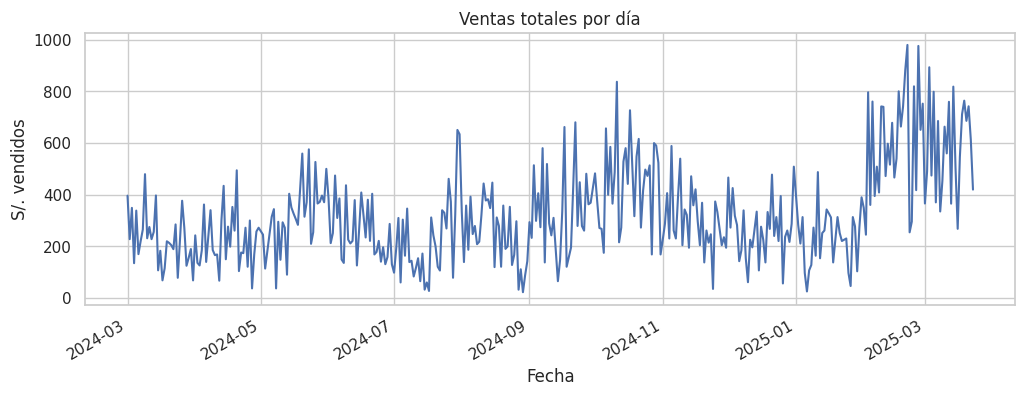

In [33]:
import matplotlib.pyplot as plt

df_diario = df.groupby('date')['money'].sum()

plt.figure(figsize=(12,4))
df_diario.plot()
plt.title("Ventas totales por día")
plt.xlabel("Fecha")
plt.ylabel("S/. vendidos")
plt.grid(True)
plt.show()


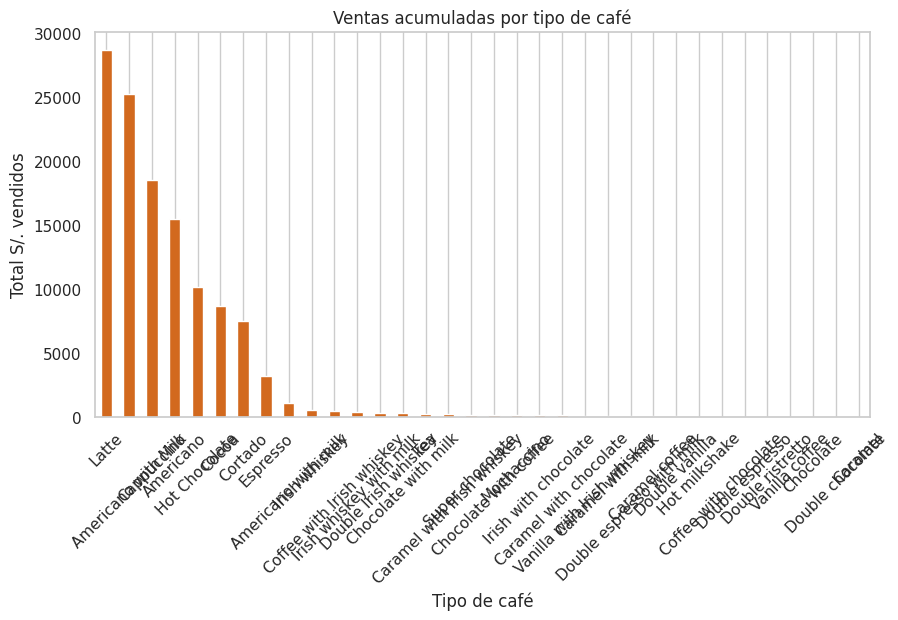

In [34]:
ventas_por_tipo = df.groupby("coffee_name")["money"].sum().sort_values(ascending=False)

ventas_por_tipo.plot(kind='bar', figsize=(10,5), color="chocolate")
plt.title("Ventas acumuladas por tipo de café")
plt.ylabel("Total S/. vendidos")
plt.xlabel("Tipo de café")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


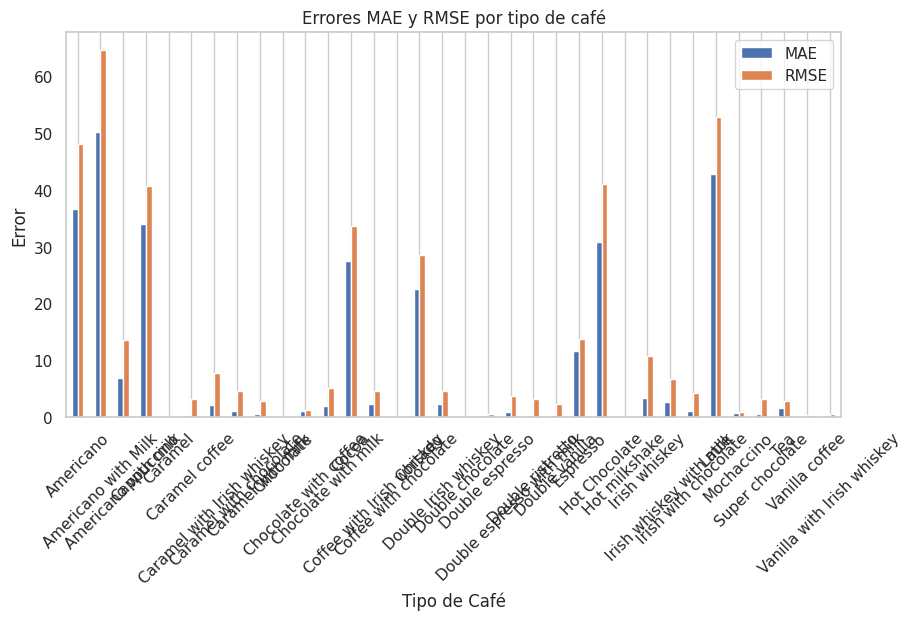

In [35]:
# Suponiendo que tienes df_metricas ya creado
df_metricas.plot(x="Tipo de Café", y=["MAE", "RMSE"], kind="bar", figsize=(10,5))
plt.title("Errores MAE y RMSE por tipo de café")
plt.ylabel("Error")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


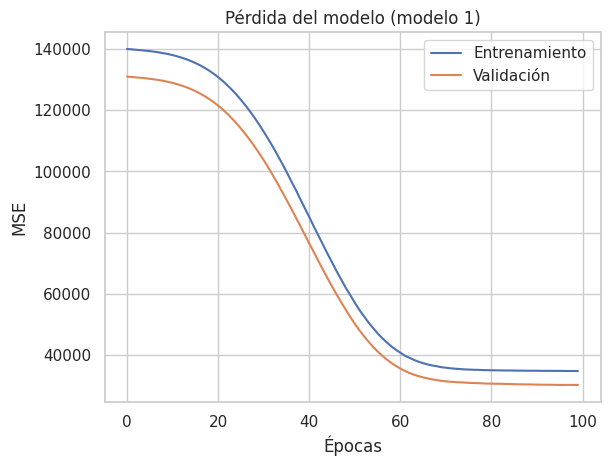

In [47]:
plt.plot(hist.history['loss'], label='Entrenamiento')
plt.plot(hist.history['val_loss'], label='Validación')
plt.title("Pérdida del modelo (modelo 1)")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()


In [40]:
hist1 = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, verbose=0)




In [43]:
# Agrupar por fecha para obtener la venta total diaria
df_total_ventas = df.groupby('date')['money'].sum().reset_index()

# Extraer mes y día de la semana
df_total_ventas['date'] = pd.to_datetime(df_total_ventas['date'])
df_total_ventas['month'] = df_total_ventas['date'].dt.month
df_total_ventas['day_of_week'] = df_total_ventas['date'].dt.dayofweek

# Mostrar vista previa
df_total_ventas.head()


,date,money,month,day_of_week
0,2024-03-01,396.3,3,4
1,2024-03-02,228.1,3,5
2,2024-03-03,349.1,3,6
3,2024-03-04,135.2,3,0
4,2024-03-05,338.5,3,1


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Entradas y salidas (reconstruimos lo esencial)
X = df_total_ventas[['month', 'day_of_week']]
y = df_total_ventas['money']

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir (por si no lo tienes guardado)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo simple
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

# Entrenar y guardar en `hist`
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Entradas y salidas
X = df_total_ventas[['month', 'day_of_week']]
y = df_total_ventas['money']

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear modelo
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

# Entrenar y guardar historial
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


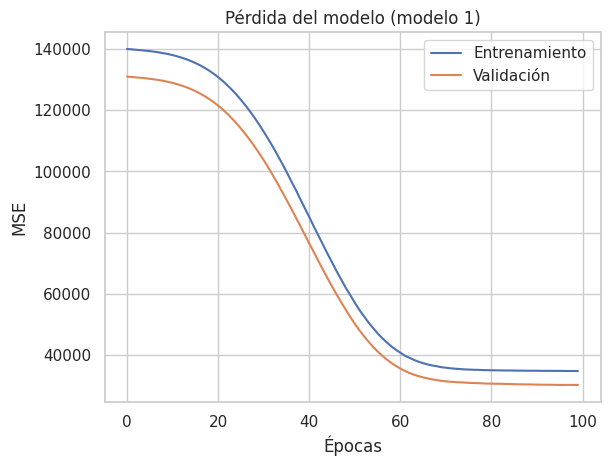

In [46]:
plt.plot(hist.history['loss'], label='Entrenamiento')
plt.plot(hist.history['val_loss'], label='Validación')
plt.title("Pérdida del modelo (modelo 1)")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()
